# Exploratory Data Analysis 2A
## *Pandas Datetime Capabilities*

#### The goal of EDA is to discover patterns in data. This is a fundamental stepping stone towards predictive modelling, or an end goal in itself. 

- Keep the questions SIMPLE and BRIEF- the goal is to understand and build complexity further on.
- Its an iterative process-- its okay to repeat things so long as you learn from previous output.

In [23]:
# importing the libraries for data processing
import numpy as np 
import pandas as pd 

#matplotlib for visualizations
import matplotlib.pyplot as plt


### 1. Data Preparation
Merge the charts and the tracks datasets. Repeat the process from the previous notebook

In [24]:
# read and process the charts dataset
charts_df = pd.read_csv('data/spotify_daily_charts.csv')
#transform date column into a datetime column
charts_df['date'] = pd.to_datetime(charts_df['date'])
charts_df.head()

,date,position,track_id,track_name,artist,streams
0,2018-01-01,1,0ofbQMrRDsUaVKq2mGLEAb,Havana,Camila Cabello,155633
1,2018-01-01,2,0tgVpDi06FyKpA1z0VMD4v,Perfect,Ed Sheeran,134756
2,2018-01-01,3,3hBBKuWJfxlIlnd9QFoC8k,What Lovers Do (feat. SZA),Maroon 5,130898
3,2018-01-01,4,1mXVgsBdtIVeCLJnSnmtdV,Too Good At Goodbyes,Sam Smith,130798
4,2018-01-01,5,2ekn2ttSfGqwhhate0LSR0,New Rules,Dua Lipa,125472


In [25]:
# read and process the tracks dataset
tracks_df = pd.read_csv('data/spotify_daily_charts_tracks.csv')
tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0ofbQMrRDsUaVKq2mGLEAb,Havana,4nDoRrQiYLoBzwC5BhVJzF,Camila Cabello,5chBPOVY2I0bG5V3igb5QL,216896,2017-08-03,5,0.768,0.517,7,-4.323,0,0.0312,0.18600,0.000038,0.1040,0.418,104.992
1,0tgVpDi06FyKpA1z0VMD4v,Perfect,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,3T4tUhGYeRNVUGevb0wThu,263400,2017-03-03,86,0.599,0.448,8,-6.312,1,0.0232,0.16300,0.000000,0.1060,0.168,95.050
2,3hBBKuWJfxlIlnd9QFoC8k,What Lovers Do (feat. SZA),04gDigrS5kc9YWfZHwBETP,Maroon 5,1Jmq5HEJeA9kNi2SgQul4U,199849,2017-11-03,5,0.795,0.615,5,-5.211,0,0.0671,0.07860,0.000003,0.0855,0.393,110.009
3,1mXVgsBdtIVeCLJnSnmtdV,Too Good At Goodbyes,2wY79sveU1sp5g7SokKOiI,Sam Smith,3TJz2UBNYJtlEly0sPeNrQ,201000,2017-11-03,81,0.681,0.372,5,-8.237,1,0.0432,0.64000,0.000000,0.1690,0.476,91.873
4,2ekn2ttSfGqwhhate0LSR0,New Rules,6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,01sfgrNbnnPUEyz6GZYlt9,209320,2017-06-02,81,0.762,0.700,9,-6.021,0,0.0694,0.00261,0.000016,0.1530,0.608,116.073


View track feature distribution

In [26]:
df = charts_df.merge(tracks_df, on='track_id', how='left')

df = df.drop(columns='track_name_y')
df = df.rename(columns={'track_name_x':'track_name'})

df.head()

,date,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2018-01-01,1,0ofbQMrRDsUaVKq2mGLEAb,Havana,Camila Cabello,155633,4nDoRrQiYLoBzwC5BhVJzF,Camila Cabello,5chBPOVY2I0bG5V3igb5QL,216896,...,0.517,7,-4.323,0,0.0312,0.18600,0.000038,0.1040,0.418,104.992
1,2018-01-01,2,0tgVpDi06FyKpA1z0VMD4v,Perfect,Ed Sheeran,134756,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,3T4tUhGYeRNVUGevb0wThu,263400,...,0.448,8,-6.312,1,0.0232,0.16300,0.000000,0.1060,0.168,95.050
2,2018-01-01,3,3hBBKuWJfxlIlnd9QFoC8k,What Lovers Do (feat. SZA),Maroon 5,130898,04gDigrS5kc9YWfZHwBETP,Maroon 5,1Jmq5HEJeA9kNi2SgQul4U,199849,...,0.615,5,-5.211,0,0.0671,0.07860,0.000003,0.0855,0.393,110.009
3,2018-01-01,4,1mXVgsBdtIVeCLJnSnmtdV,Too Good At Goodbyes,Sam Smith,130798,2wY79sveU1sp5g7SokKOiI,Sam Smith,3TJz2UBNYJtlEly0sPeNrQ,201000,...,0.372,5,-8.237,1,0.0432,0.64000,0.000000,0.1690,0.476,91.873
4,2018-01-01,5,2ekn2ttSfGqwhhate0LSR0,New Rules,Dua Lipa,125472,6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,01sfgrNbnnPUEyz6GZYlt9,209320,...,0.700,9,-6.021,0,0.0694,0.00261,0.000016,0.1530,0.608,116.073


### 2. Pandas Date Aggregation Capabilties

##### 2.1. Resampling

With a datetime object set as index, a pandas dataframe can be aggregated in time with one simple line!

In [27]:
df = df.set_index('date')
df.head()

,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,release_date,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,1,0ofbQMrRDsUaVKq2mGLEAb,Havana,Camila Cabello,155633,4nDoRrQiYLoBzwC5BhVJzF,Camila Cabello,5chBPOVY2I0bG5V3igb5QL,216896,2017-08-03,...,0.517,7,-4.323,0,0.0312,0.18600,0.000038,0.1040,0.418,104.992
2018-01-01,2,0tgVpDi06FyKpA1z0VMD4v,Perfect,Ed Sheeran,134756,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,3T4tUhGYeRNVUGevb0wThu,263400,2017-03-03,...,0.448,8,-6.312,1,0.0232,0.16300,0.000000,0.1060,0.168,95.050
2018-01-01,3,3hBBKuWJfxlIlnd9QFoC8k,What Lovers Do (feat. SZA),Maroon 5,130898,04gDigrS5kc9YWfZHwBETP,Maroon 5,1Jmq5HEJeA9kNi2SgQul4U,199849,2017-11-03,...,0.615,5,-5.211,0,0.0671,0.07860,0.000003,0.0855,0.393,110.009
2018-01-01,4,1mXVgsBdtIVeCLJnSnmtdV,Too Good At Goodbyes,Sam Smith,130798,2wY79sveU1sp5g7SokKOiI,Sam Smith,3TJz2UBNYJtlEly0sPeNrQ,201000,2017-11-03,...,0.372,5,-8.237,1,0.0432,0.64000,0.000000,0.1690,0.476,91.873
2018-01-01,5,2ekn2ttSfGqwhhate0LSR0,New Rules,Dua Lipa,125472,6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,01sfgrNbnnPUEyz6GZYlt9,209320,2017-06-02,...,0.700,9,-6.021,0,0.0694,0.00261,0.000016,0.1530,0.608,116.073


In [28]:
#get total monthly streams
yr_df = df['streams'].resample('Y').sum() #M for month
yr_df

date
2018-12-31    3467089600
2019-12-31    4081571771
2020-12-31    2760629720
Freq: A-DEC, Name: streams, dtype: int64

Text(0.5, 1.0, 'Spotify Yearly Total Streams')

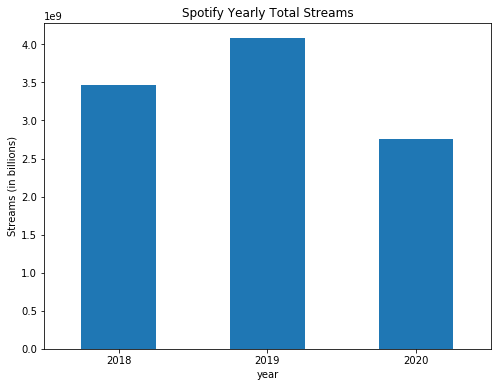

In [29]:
#bar chart of yearly streams
fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
yr_df.plot(ax=ax, kind='bar')

#Uncomment for cleaner x labels
ax.set_xticklabels([x.strftime('%Y') for x in yr_df.index], rotation=0)

plt.xlabel('year')
plt.ylabel('Streams (in billions)')
plt.title('Spotify Yearly Total Streams')

In [30]:
#get total monthly streams
mon_df = df['streams'].resample('M').sum() #M for month
mon_df

date
2018-01-31    281230105
2018-02-28    271188277
2018-03-31    286735761
2018-04-30    270453269
2018-05-31    286514347
2018-06-30    281181083
2018-07-31    290420279
2018-08-31    286865491
2018-09-30    264549769
2018-10-31    316535375
2018-11-30    310459901
2018-12-31    320955943
2019-01-31    336261153
2019-02-28    329369841
2019-03-31    349458593
2019-04-30    315993125
2019-05-31    317290201
2019-06-30    307560749
2019-07-31    341420972
2019-08-31    348835864
2019-09-30    340254556
2019-10-31    361953677
2019-11-30    356435728
2019-12-31    376737312
2020-01-31    386949218
2020-02-29    373569531
2020-03-31    343451485
2020-04-30    273068617
2020-05-31    282020357
2020-06-30    299742531
2020-07-31    334615639
2020-08-31    310896643
2020-09-30    156315699
Freq: M, Name: streams, dtype: int64

Text(0.5, 1.0, 'Spotify Monthly Total Streams')

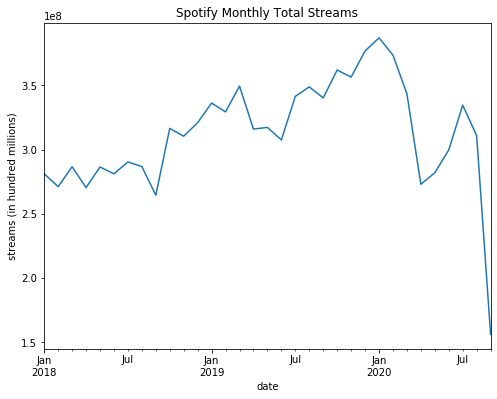

In [31]:
#line chart of monthly streams

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter
mon_df.plot(ax=ax, kind='line')

#Uncomment for cleaner x labels
#ax.set_xticklabels([x.strftime('%Y-%m') for x in mon_df.index])

plt.ylabel('streams (in hundred millions)')
plt.title('Spotify Monthly Total Streams')

Q: Compute for the artist *BLACKPINK*'s total yearly streams from 2018-2020

In [32]:
df[df['artist']=='BLACKPINK']['streams'].resample('Y').sum()

date
2018-12-31    30590001
2019-12-31    75080233
2020-12-31    36355526
Freq: A-DEC, Name: streams, dtype: int64

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

#### 2.2 First-Order differencing

At times, we might be more interested in the change of a quantity in time rather than the absolute quantities. We use `df.diff()` for this

In [33]:
# month - previous month
delta_mon_df = mon_df.diff()
delta_mon_df

date
2018-01-31            NaN
2018-02-28    -10041828.0
2018-03-31     15547484.0
2018-04-30    -16282492.0
2018-05-31     16061078.0
2018-06-30     -5333264.0
2018-07-31      9239196.0
2018-08-31     -3554788.0
2018-09-30    -22315722.0
2018-10-31     51985606.0
2018-11-30     -6075474.0
2018-12-31     10496042.0
2019-01-31     15305210.0
2019-02-28     -6891312.0
2019-03-31     20088752.0
2019-04-30    -33465468.0
2019-05-31      1297076.0
2019-06-30     -9729452.0
2019-07-31     33860223.0
2019-08-31      7414892.0
2019-09-30     -8581308.0
2019-10-31     21699121.0
2019-11-30     -5517949.0
2019-12-31     20301584.0
2020-01-31     10211906.0
2020-02-29    -13379687.0
2020-03-31    -30118046.0
2020-04-30    -70382868.0
2020-05-31      8951740.0
2020-06-30     17722174.0
2020-07-31     34873108.0
2020-08-31    -23718996.0
2020-09-30   -154580944.0
Freq: M, Name: streams, dtype: float64

Q: How did Spotify streams grow month-on-month from 2018 to 2020?

Text(0.5, 1.0, 'Spotify Month-on-Month Stream Growth')

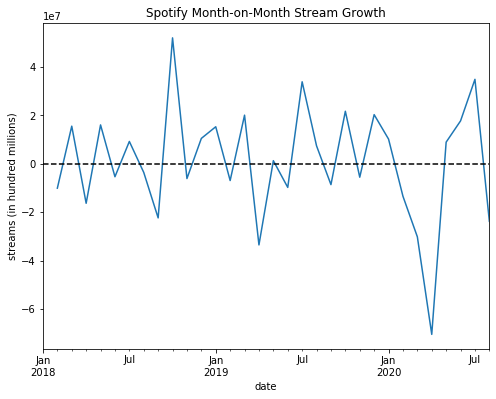

In [34]:
#line chart of monthly streams

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter
#omit incomplete month
delta_mon_df[:-1].plot(ax=ax)

#Uncomment for cleaner x labels
#ax.set_xticklabels([x.strftime('%Y-%m') for x in mon_df.index])

#add reference line at y=0
plt.axhline(0, color='k', ls='--')

plt.ylabel('streams (in hundred millions)')
plt.title('Spotify Month-on-Month Stream Growth')

> Q: Can you show the above month-on-month growth plot as a percentage of the previous month?

#### 2.3 Cummulative sum

We compute for the cummulative sum using `df.cumsum()`

In [35]:
#get cummulative total spotify monthly streams
mon_df.cumsum()

date
2018-01-31      281230105
2018-02-28      552418382
2018-03-31      839154143
2018-04-30     1109607412
2018-05-31     1396121759
2018-06-30     1677302842
2018-07-31     1967723121
2018-08-31     2254588612
2018-09-30     2519138381
2018-10-31     2835673756
2018-11-30     3146133657
2018-12-31     3467089600
2019-01-31     3803350753
2019-02-28     4132720594
2019-03-31     4482179187
2019-04-30     4798172312
2019-05-31     5115462513
2019-06-30     5423023262
2019-07-31     5764444234
2019-08-31     6113280098
2019-09-30     6453534654
2019-10-31     6815488331
2019-11-30     7171924059
2019-12-31     7548661371
2020-01-31     7935610589
2020-02-29     8309180120
2020-03-31     8652631605
2020-04-30     8925700222
2020-05-31     9207720579
2020-06-30     9507463110
2020-07-31     9842078749
2020-08-31    10152975392
2020-09-30    10309291091
Freq: M, Name: streams, dtype: int64

Q: Compute for the cummulative total monthly streams of Ben and Ben's 'Kathang Isip' 

In [36]:
df[df['track_name']=='Kathang Isip']['streams'].resample('M').sum().cumsum()

date
2018-01-31       863016
2018-02-28      2321805
2018-03-31      5359897
2018-04-30      8331316
2018-05-31     11887014
2018-06-30     15893736
2018-07-31     20430474
2018-08-31     25357043
2018-09-30     29978299
2018-10-31     35882553
2018-11-30     41449085
2018-12-31     46783256
2019-01-31     52657003
2019-02-28     57841159
2019-03-31     62183322
2019-04-30     65248938
2019-05-31     68308278
2019-06-30     70990183
2019-07-31     74061883
2019-08-31     77465475
2019-09-30     81141616
2019-10-31     84900377
2019-11-30     88396642
2019-12-31     92113207
2020-01-31     95912754
2020-02-29     99982611
2020-03-31    103510398
2020-04-30    105995046
2020-05-31    108464678
2020-06-30    110995285
2020-07-31    113535850
2020-08-31    116128804
2020-09-30    117417737
Freq: M, Name: streams, dtype: int64

Text(0.5, 1.0, 'Spotify Monthly Total Streams')

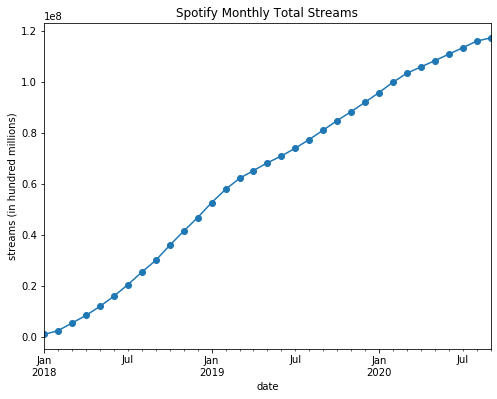

In [37]:
#line chart of monthly streams

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter
data = df[df['track_name']=='Kathang Isip']['streams'].resample('M').sum().cumsum()

data.plot(ax=ax,marker='o')
#Uncomment for cleaner x labels
#ax.set_xticklabels([x.strftime('%Y-%m') for x in mon_df.index])

plt.ylabel('streams (in hundred millions)')
plt.title('Spotify Monthly Total Streams')

Q: How does the cummulative total monthly streams of Ed Sheeran's Shape of You compare with  Ben and Ben's 'Kathang Isip' ?

Text(0.5, 1.0, 'Spotify Monthly Total Streams')

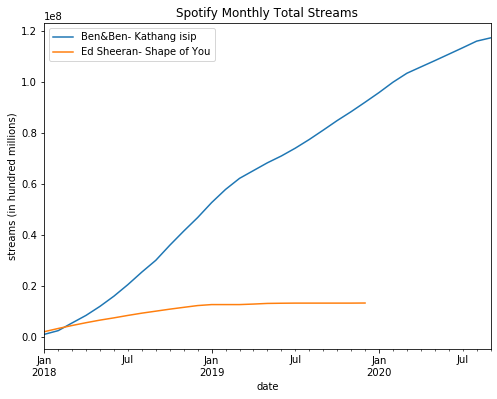

In [38]:
#line chart of monthly streams

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter
data1 = df[df['track_name']=='Kathang Isip']['streams'].resample('M').sum().cumsum()
data2 = df[df['track_name']=='Shape of You']['streams'].resample('M').sum().cumsum()

data1.plot(ax=ax, label='Ben&Ben- Kathang isip')
data2.plot(ax=ax, label='Ed Sheeran- Shape of You')
#Uncomment for cleaner x labels
#ax.set_xticklabels([x.strftime('%Y-%m') for x in mon_df.index])

plt.legend()
plt.ylabel('streams (in hundred millions)')
plt.title('Spotify Monthly Total Streams')

#### 2.4 Rolling window

We can use the function `.rolling()` to define a time series window where we could aggregate the target variable

Q: Smooth out daily streams of Ben and Ben's Kathang Isip over a 1-week window

In [39]:
df[df['track_name']=='Kathang Isip']['streams'].rolling(7).mean()

date
2018-01-01             NaN
2018-01-02             NaN
2018-01-03             NaN
2018-01-04             NaN
2018-01-05             NaN
                  ...     
2020-09-11    85417.285714
2020-09-12    85802.857143
2020-09-13    86203.714286
2020-09-14    86620.142857
2020-09-15    86911.571429
Name: streams, Length: 989, dtype: float64

Text(0.5, 1.0, 'Spotify Daily Streams: Ben&Ben- Kathang isip')

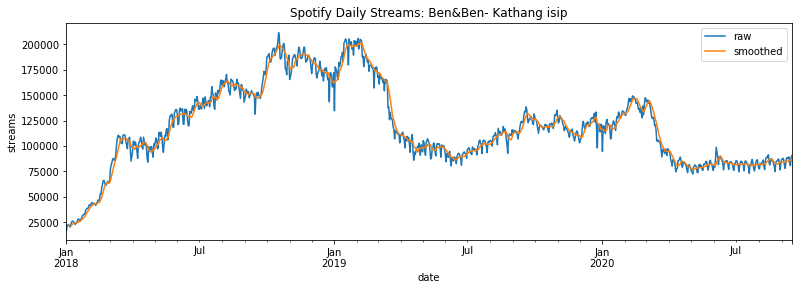

In [40]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)

data1 = df[df['track_name']=='Kathang Isip']['streams']
data2 = df[df['track_name']=='Kathang Isip']['streams'].rolling(7).mean()

data1.plot(ax=ax, label='raw')
data2.plot(ax=ax, label='smoothed')

plt.legend()
plt.ylabel('streams')
plt.title('Spotify Daily Streams: Ben&Ben- Kathang isip')


Q: Compare the 7-day smoothed daily streams of Ben and Ben's Kathang Isip and Taylor Swift's Lover

Text(0.5, 1.0, 'Spotify Daily Streams')

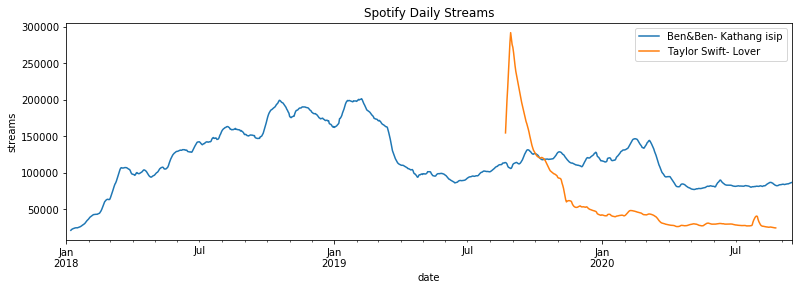

In [41]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)

data1 = df[df['track_name']=='Kathang Isip']['streams'].rolling(7).mean()
data2 = df[df['track_name']=='Lover']['streams'].rolling(7).mean()

data1.plot(ax=ax, label='Ben&Ben- Kathang isip')
data2.plot(ax=ax, label='Taylor Swift- Lover')

plt.legend()
plt.ylabel('streams')
plt.title('Spotify Daily Streams')


Q: Compare the 7-day top chart **position** for Ben and Ben and Ariana Grande

Text(0.5, 1.0, 'Spotify Weekly Top Chart Positions')

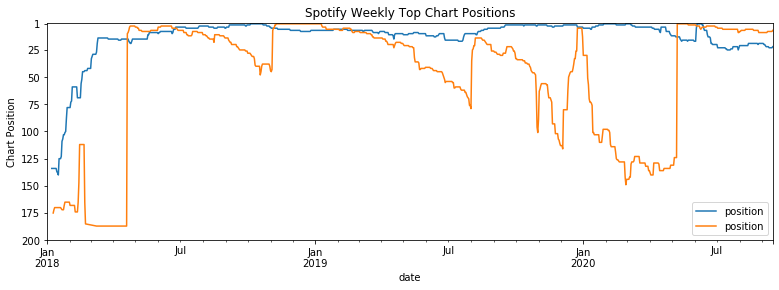

In [55]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)

#get top position of all charting songs of the artist per day
data1 = df[df['artist']=='Ben&Ben'].groupby('date')[['position']].min()
#get rolling 7 day minimum of top daily positions
data1 = data1.rolling(7).min()
data2 = df[df['artist']=='Ariana Grande'].groupby('date')[['position']].min()
data2 = data2.rolling(7).min()

data1.plot(ax=ax, label='Ben&Ben')
data2.plot(ax=ax, label='Ariana Grande')

#reverse the yaxis to show 1 on top
plt.ylim([200,0])
plt.yticks([1]+np.arange(25,201,25).tolist())

plt.legend()
plt.ylabel('Chart Position')
plt.title('Spotify Weekly Top Chart Positions')


### 4. Interactive Time-Series plot in Bokeh


In [45]:
# Standard imports 
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

Convert the above plots into Bokeh charts

In [120]:
from bokeh.models import Range1d

data1 = df[df['artist']=='Ben&Ben'].groupby('date')[['position']].min()
data1 = data1.rolling(7).min()
data2 = df[df['artist']=='Ariana Grande'].groupby('date')[['position']].min()
data2 = data2.rolling(7).min()

p = figure(x_axis_type="datetime", title="Spotify Daily Charts", plot_height=350, plot_width=800)
p.xgrid.grid_line_color=None
p.ygrid.grid_line_alpha=0.5
p.xaxis.axis_label = 'date'
p.yaxis.axis_label = 'Position'
p.y_range.flipped = True
p.y_range=Range1d(200,0.5)

p.yaxis.ticker = [1,50,100,150,200]
#p.xaxis.major_label_overrides = {1: 'A', 2: 'B', 3: 'C'}

#add .flatten() to y-values to deal with rolling window value nesting
p.line(data1.index, data1.values.flatten(), color='blue',legend_label="Ben&Ben")
p.line(data2.index, data2.values.flatten(), color='orange', legend_label="Ariana Grande")

p.legend.location = "bottom_right"
p.legend.click_policy="hide"

show(p)

In [132]:
from bokeh.models import Range1d
from bokeh.models.tools import HoverTool

data1 = df[df['artist']=='Ben&Ben'].groupby('date')[['position']].min()
data1 = data1.rolling(7).min()
#data1['artist']='Ben&Ben'
data2 = df[df['artist']=='Ariana Grande'].groupby('date')[['position']].min()
data2 = data2.rolling(7).min()
#data2['artist']='Ariana Grande'

p = figure(x_axis_type="datetime", title="Spotify Daily Charts", plot_height=350, plot_width=800)
p.xgrid.grid_line_color=None
p.ygrid.grid_line_alpha=0.5
p.xaxis.axis_label = 'date'
p.yaxis.axis_label = 'Position'
p.y_range.flipped = True
p.y_range=Range1d(200,0.5)

p.yaxis.ticker = [1,50,100,150,200]
#p.xaxis.major_label_overrides = {1: 'A', 2: 'B', 3: 'C'}

#add .flatten() to y-values to deal with rolling window value nesting
p.line(data1.index, data1.values.flatten(), color='blue',legend_label="Ben&Ben")
p.line(data2.index, data2.values.flatten(), color='orange', legend_label="Ariana Grande")

p.legend.location = "bottom_right"
p.legend.click_policy="hide"

#add hover tool
p.add_tools(HoverTool(
    tooltips=[
        ('date', '@x{%F}'),
        ('position','@y')
    ],
    formatters={
        '@x' : 'datetime',
    }
))

show(p)